In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.initializers import he_normal

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def load_npy(hold_position):
    file_path = "../Output/train/train_" + hold_position + "/train_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_ver2_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT
    return result

In [3]:
train_Bag = load_npy("Bag")
train_Hips = load_npy("Hips")
train_Hips = np.delete(train_Hips, 120845, 0)
train_Torso = load_npy("Torso")
train_Hand = load_npy("Hand")

train_Bag.shape, train_Hips.shape

((195491, 50), (195490, 50))

In [4]:
X_train = np.concatenate([train_Bag, train_Hips, train_Torso, train_Hand], axis=0)
X_train.shape

(781963, 50)

In [5]:
X_train

array([[3.38048607e-01, 9.46694894e-01, 2.50814669e-01, ...,
        5.04000000e+01, 1.31335701e+00, 5.04000000e+01],
       [2.30354991e+00, 4.14904319e+00, 7.78116556e-02, ...,
        5.24000000e+01, 1.95531726e+00, 5.70000000e+01],
       [1.05029750e+00, 8.91610622e-01, 3.24773186e-02, ...,
        5.08000000e+01, 2.93655188e-01, 5.58000000e+01],
       ...,
       [6.87660885e-01, 1.62077566e-01, 8.38939090e-02, ...,
        4.58000000e+01, 1.29144298e-01, 5.78000000e+01],
       [6.85845427e-01, 1.53754305e-01, 1.62290390e-02, ...,
        5.18000000e+01, 2.00128138e-01, 5.18000000e+01],
       [6.70370715e-01, 1.83664801e-01, 3.97830372e-02, ...,
        5.38000000e+01, 2.10448935e-01, 5.68000000e+01]])

In [5]:
Y_train = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0]
Y_train = np.concatenate([Y_train, np.delete(Y_train, 120845, 0), Y_train, Y_train], axis=0)
Y_train.shape

(781963, 1)

In [6]:
def load_npy(hold_position):
    file_path = "../Output/validation/validation_" + hold_position + "/validation_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_ver2_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT
    return result

In [7]:
validation_Bag = load_npy("Bag")
validation_Hips = load_npy("Hips")
validation_Torso = load_npy("Torso")
validation_Hand = load_npy("Hand")

validation_Bag.shape

(28685, 50)

In [8]:
X_val = np.concatenate([validation_Bag, validation_Hips, validation_Torso, validation_Hand], axis=0)
X_val.shape

(114740, 50)

In [9]:
Y_val = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
Y_val = np.concatenate([Y_val, Y_val, Y_val, Y_val], axis=0)
Y_val.shape

(114740, 1)

In [10]:
Y_val_hold_position = np.zeros((28685*4, 1))
for i in range(4):
    Y_val_hold_position[28685*i:28685*(i+1)] = i
Y_val_hold_position.shape

(114740, 1)

In [11]:
Y_val = np.concatenate([Y_val, Y_val_hold_position], axis=1)
Y_val.shape

(114740, 2)

In [12]:
Y_train[Y_train >= 5] = 1
Y_val[Y_val >= 5] = 1

## 標準化

In [13]:
std = StandardScaler()
hz_std = StandardScaler()

X_train[:, [0,1,2,3,4,5,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48]] = std.fit_transform(X_train[:, [0,1,2,3,4,5,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48]])
X_val[:, [0,1,2,3,4,5,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48]] = std.fit_transform(X_val[:, [0,1,2,3,4,5,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48]])

X_train[:, [i for i in range(11, 50)]] = hz_std.fit_transform(X_train[:, [i for i in range(11, 50)]])
X_val[:, [i for i in range(11, 50)]] = hz_std.transform(X_val[:, [i for i in range(11, 50)]])

X_train.shape, X_val.shape

((781963, 50), (114740, 50))

## 丸める3より5の方が精度高かった

In [7]:
X_train = X_train.astype(np.float32)
X_train

array([[3.3804861e-01, 9.4669491e-01, 2.5081468e-01, ..., 5.0400002e+01,
        1.3133570e+00, 5.0400002e+01],
       [2.3035500e+00, 4.1490431e+00, 7.7811658e-02, ..., 5.2400002e+01,
        1.9553173e+00, 5.7000000e+01],
       [1.0502975e+00, 8.9161062e-01, 3.2477319e-02, ..., 5.0799999e+01,
        2.9365519e-01, 5.5799999e+01],
       ...,
       [6.8766087e-01, 1.6207756e-01, 8.3893910e-02, ..., 4.5799999e+01,
        1.2914430e-01, 5.7799999e+01],
       [6.8584543e-01, 1.5375431e-01, 1.6229039e-02, ..., 5.1799999e+01,
        2.0012814e-01, 5.1799999e+01],
       [6.7037070e-01, 1.8366480e-01, 3.9783038e-02, ..., 5.3799999e+01,
        2.1044894e-01, 5.6799999e+01]], dtype=float32)

In [14]:
X_train = np.round(X_train, 5)
X_val = np.round(X_val, 5)
X_train

array([[-0.48098, -0.20679,  0.47418, ...,  0.27292,  0.02477, -1.81045],
       [ 0.25378, -0.01536,  0.19819, ...,  0.93347,  0.19536,  0.37646],
       [-0.21472, -0.21009,  0.12586, ...,  0.40503, -0.24621, -0.02116],
       ...,
       [-0.35028, -0.2537 ,  0.20789, ..., -1.24637, -0.28993,  0.64154],
       [-0.35096, -0.2542 ,  0.09994, ...,  0.73531, -0.27106, -1.34656],
       [-0.35675, -0.25241,  0.13752, ...,  1.39587, -0.26832,  0.31019]])

In [15]:
np.sum(np.isnan(X_train)), np.sum(np.isnan(Y_train)), np.unique(Y_train), np.unique(Y_val[:, 0])

(0, 0, array([1., 2., 3., 4.]), array([1., 2., 3., 4.]))

In [16]:
Y_train = Y_train - 1
Y_train = Y_train.astype(np.int32)
Y_val[:, 0] = Y_val[:, 0] - 1
Y_val = Y_val.astype(np.int32)

In [17]:
Y_train.shape, Y_val.shape

((781963, 1), (114740, 2))

In [18]:
from tensorflow.keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [19]:
X_train = X_train.reshape([-1, 50, 1])
X_val = X_val.reshape([-1, 50, 1])

X_train.shape, X_val.shape

((781963, 50, 1), (114740, 50, 1))

In [20]:
model = tf.keras.Sequential()
# model.add(layers.Flatten())
model.add(layers.Conv1D(64, 3, padding='valid', activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.Conv1D(32, 3, padding='same', activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.MaxPooling1D(2))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(64, 3, padding='valid', activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.Conv1D(32, 3, padding='same', activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1])

In [22]:
cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath="../Output/CheckPoint/model{epoch:02d}-{loss:.2f}-{accuracy:.2f}-{val_loss:.2f}-{val_accuracy:.2f}.hdf5", 
                                           monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, epochs=128, batch_size=2048, validation_data=(X_val, Y_val[:, 0]), class_weight={0:1, 1:5.69, 2:16.48, 3:5.93}, callbacks=[cp_cb, es_cb])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 781963 samples, validate on 114740 samples
Epoch 1/128
781963/781963 [==============================] - 5s 6us/sample - loss: 0.7741 - accuracy: 0.9360 - f1: 0.5029 - val_loss: 1.7358 - val_accuracy: 0.8659 - val_f1: 0.4449
Epoch 2/128
781963/781963 [==============================] - 5s 6us/sample - loss: 0.7019 - accuracy: 0.9411 - f1: 0.4983 - val_loss: 1.7368 - val_accuracy: 0.8693 - val_f1: 0.4406
Epoch 3/128
781963/781963 [==============================] - 5s 6us/sample - loss: 0.6607 - accuracy: 0.9438 - f1: 0.4953 - val_loss: 1.7341 - val_accuracy: 0.8635 - val_f1: 0.4406
Epoch 4/128
781963/781963 [==============================] - 5s 6us/sample - loss: 0.6410 - accuracy: 0.9450 - f1: 0.4944 - val_loss: 1.6978 - val_accuracy: 0.8648 - val_f1: 0.4393
Epoch 5/128
781963/781963 [==============================] - 5s 6us/sample - loss: 0.6121 - accuracy: 0.9469 - f1: 0.4920 - val_loss: 1.9168 - val_accuracy: 0.8657 - val_f1: 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 32)            6176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 32)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 64)            6208      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 22, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 32)            0

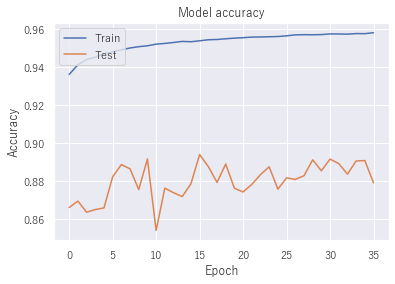

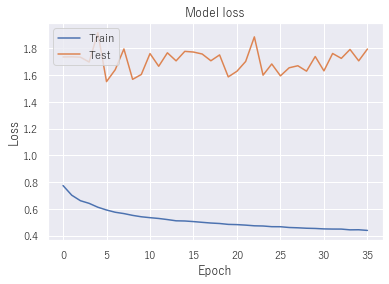

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.ylim((0, 3.5))
plt.show()

In [25]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=16)
    fig.tight_layout()
    return ax

0.756

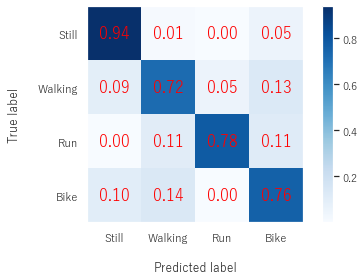

In [30]:
class_names = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']
predict = model.predict_classes(X_val)
plot_confusion_matrix(Y_val[:, 0], predict, class_names, True)
plt.grid(False)
f1_macro = f1_score(Y_val[:, 0], predict, average='macro')
round(f1_macro, 3)

0.808
0.708
0.792
0.719


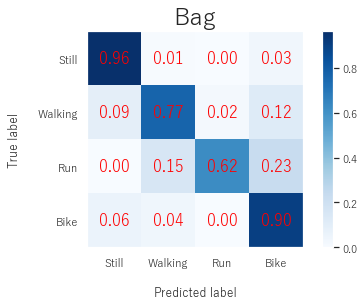

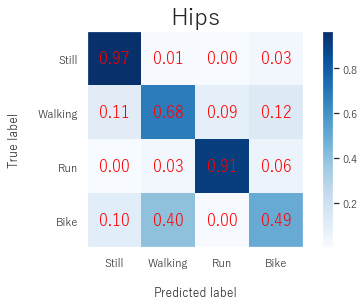

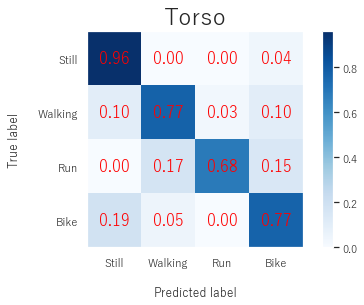

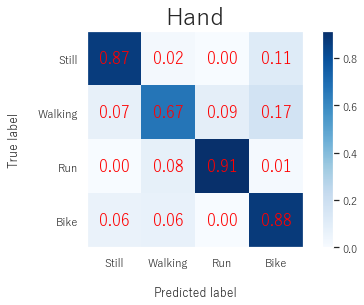

In [31]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
for i in range(4):
    plot_confusion_matrix(Y_val[Y_val[:, 1]==i][:, 0], predict[Y_val[:, 1]==i], class_names, True)
    print(round(f1_score(Y_val[Y_val[:, 1]==i][:, 0], predict[Y_val[:, 1]==i], average='macro'), 3))
    plt.title(hold_positions[i], fontsize=24)
    plt.grid(False)

In [29]:
model = tf.keras.models.load_model('../Output/CheckPoint/model06-0.59-0.95-1.55-0.88.hdf5', custom_objects={'f1':f1})

# データ数をRunのサンプル数に合わせる

In [ ]:
train_Still = X_train[(Y_train==0)[:, 0]]
train_Walking = X_train[(Y_train==1)[:, 0]]
train_Run = X_train[(Y_train==2)[:, 0]]
train_Bike = X_train[(Y_train==3)[:, 0]]

train_Still.shape, train_Walking.shape, train_Run.shape, train_Bike.shape

In [ ]:
train_Still = train_Still[np.random.choice(train_Still.shape[0], 33699, replace=False)]
train_Walking = train_Walking[np.random.choice(train_Walking.shape[0], 33699, replace=False)]
train_Bike = train_Bike[np.random.choice(train_Bike.shape[0], 33699, replace=False)]

train_Still.shape, train_Walking.shape, train_Bike.shape

In [ ]:
X_train = np.concatenate([train_Still, train_Walking, train_Run, train_Bike], axis=0)
Y_train = [0] * 33699 + [1] * 33699 + [2] * 33699 + [3] * 33699
Y_train = np.array(Y_train).reshape([-1, 1])
X_train.shape, Y_train.shape

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], 1), kernel_initializer=he_normal()))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1])

In [ ]:
history = model.fit(X_train, Y_train, epochs=64, batch_size=512, validation_data=(X_val, Y_val[:, 0]))

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0, 3.5))
plt.show()

In [ ]:
class_names = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']
predict = model.predict_classes(X_val)
plot_confusion_matrix(Y_val[:, 0], predict, class_names, True)
plt.grid(False)
f1_macro = f1_score(Y_val[:, 0], predict, average='macro')
round(f1_macro, 3)

In [ ]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
for i in range(4):
    plot_confusion_matrix(Y_val[Y_val[:, 1]==i][:, 0], predict[Y_val[:, 1]==i], class_names, True)
    print(round(f1_score(Y_val[Y_val[:, 1]==i][:, 0], predict[Y_val[:, 1]==i], average='macro'), 3))
    plt.title(hold_positions[i], fontsize=24)
    plt.grid(False)